In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from treatment import get_treated_data

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rafael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rafael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
X_train, X_test, y_train, y_test = get_treated_data()

In [3]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [4]:
y_pred = knn_model.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.8945783132530121


In [6]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1829
           1       0.99      0.51      0.67       495

    accuracy                           0.89      2324
   macro avg       0.94      0.75      0.81      2324
weighted avg       0.91      0.89      0.88      2324



In [7]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

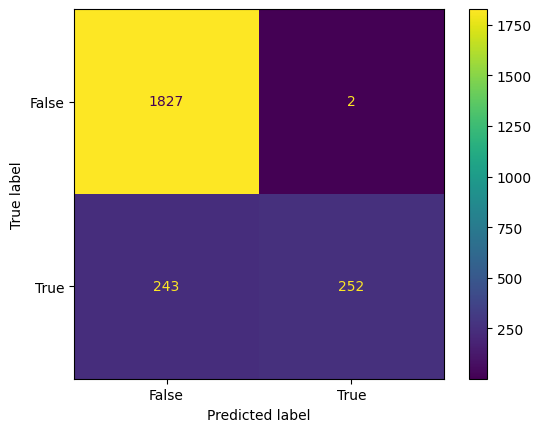

In [8]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [9]:
#Implementação do Grid Search

In [10]:
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [11]:
grid_search= GridSearchCV(knn_model, param_grid, verbose = 1, cv=3, n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [12]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}


In [13]:
best_knn_model = grid_search.best_estimator_


In [14]:
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [15]:
grid_pred = best_knn_model.predict(X_test)

In [16]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9096385542168675


In [17]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1829
           1       1.00      0.58      0.73       495

    accuracy                           0.91      2324
   macro avg       0.95      0.79      0.84      2324
weighted avg       0.92      0.91      0.90      2324



In [18]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

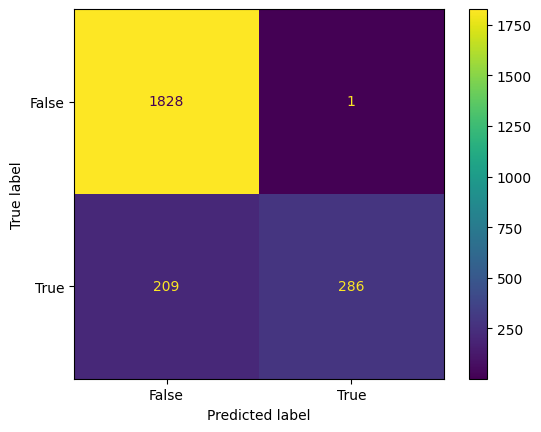

In [19]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [ ]:
test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

processed_test_text = finalpreprocess(test_text)

print("Texto de teste após pré-processamento:", processed_test_text)

prediction = best_decision_tree_model.predict(processed_test_text)

if prediction[0]:
    print("O texto é spam!")
else:
    print("O texto não é spam (ham)!")